In [1]:
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 14.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 78.5 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.4-cp310-cp310-linux_x86_64.whl size=3327207 sha256=487312cb197915069558214fadf916ab6368fbbf330b7ad72d2e5a5d736d052b
  Stored in directory: /root/.cache/pip/wheels/08/5e/55/a7db8d57920eb2c2aa41c36dc4c6d3cd12323865de191a7211
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566165 sha256=4b2a01b786c381d480a7a7aabc69cd19201f670a34e89ff3f3587d8dae08cd7b
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built dlib face-recognition-models


In [2]:
import cv2
import face_recognition

# Define the mapping of landmarks to classes
landmark_mapping = {
    "TopLeft": 0,
    "TopCenter": 1,
    "TopRight": 2,
    "MiddleLeft": 3,
    "MiddleRight": 4,
    "BottomLeft": 5,
    "BottomCenter": 6,
    "BottomRight": 7
}

# Load the image
image = cv2.imread('/kaggle/input/aboveeeeee/above.jpeg')

# Find all face landmarks in the image
face_landmarks_list = face_recognition.face_landmarks(image)

# Loop through each face
for face_landmarks in face_landmarks_list:
    # Extract eye landmarks
    left_eye = face_landmarks['left_eye']
    right_eye = face_landmarks['right_eye']
    
    # Calculate the average position of the eye landmarks
    left_eye_center = (
        sum([point[0] for point in left_eye]) // len(left_eye),
        sum([point[1] for point in left_eye]) // len(left_eye)
    )
    right_eye_center = (
        sum([point[0] for point in right_eye]) // len(right_eye),
        sum([point[1] for point in right_eye]) // len(right_eye)
    )
    
    # Determine the eye landmark positions relative to the eye centers
    eye_landmarks = []
    for landmark in left_eye + right_eye:
        x_rel = landmark[0] - left_eye_center[0] if landmark in left_eye else landmark[0] - right_eye_center[0]
        y_rel = landmark[1] - left_eye_center[1] if landmark in left_eye else landmark[1] - right_eye_center[1]
        eye_landmarks.append((x_rel, y_rel))
    
    # Map the eye landmarks to your predefined classes
    eye_positions = []
    for landmark in eye_landmarks:
        if landmark[1] < -10:
            if landmark[0] < -10:
                eye_positions.append("TopLeft")
            elif landmark[0] > 10:
                eye_positions.append("TopRight")
            else:
                eye_positions.append("TopCenter")
        elif landmark[1] > 10:
            if landmark[0] < -10:
                eye_positions.append("BottomLeft")
            elif landmark[0] > 10:
                eye_positions.append("BottomRight")
            else:
                eye_positions.append("BottomCenter")
        else:
            if landmark[0] < -10:
                eye_positions.append("MiddleLeft")
            else:
                eye_positions.append("MiddleRight")
    
    # Print the detected eye positions
    print(f"Left eye position: {eye_positions[:len(left_eye)]}")
    print(f"Right eye position: {eye_positions[len(left_eye):]}")

# Display the image with landmarks
for face_landmarks in face_landmarks_list:
    for facial_feature in face_landmarks.keys():
        for point in face_landmarks[facial_feature]:
            cv2.circle(image, point, 2, (255, 0, 0), -1)

cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Left eye position: ['MiddleLeft', 'TopLeft', 'TopRight', 'BottomRight', 'BottomRight', 'BottomLeft']
Right eye position: ['BottomLeft', 'TopLeft', 'TopRight', 'MiddleRight', 'BottomRight', 'BottomLeft']


error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [19]:
def calculate_accuracy(actual_label, predicted_label):
    if actual_label == predicted_label:
        return 1.0
    else:
        return 0.0


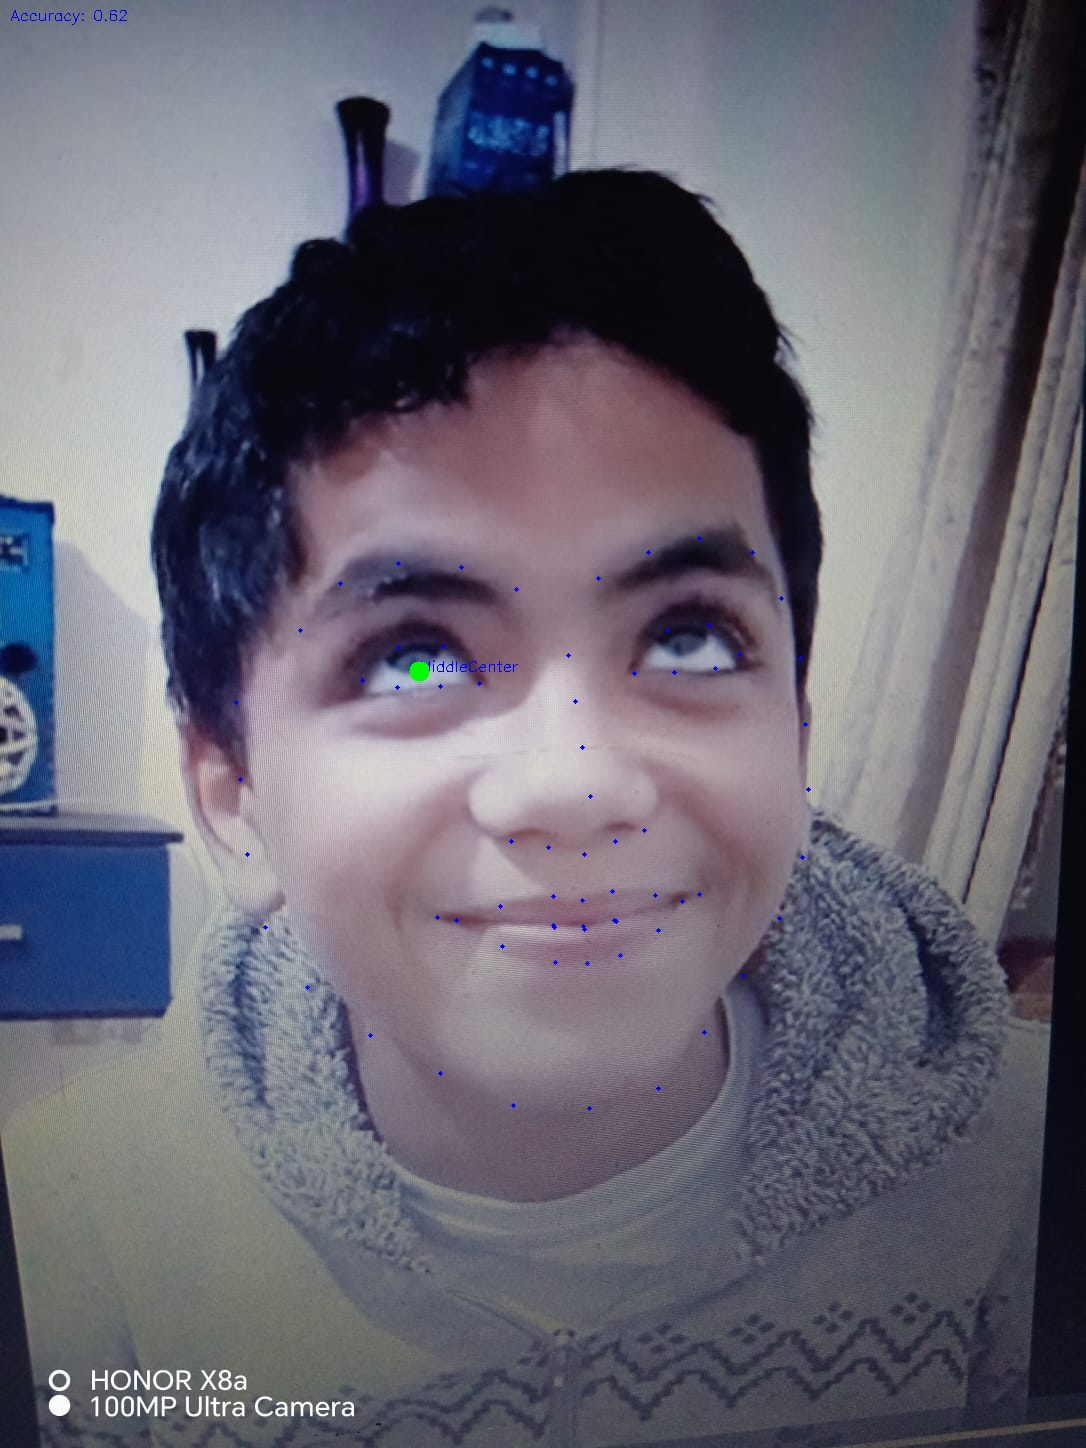

In [24]:
import cv2
import face_recognition
from IPython.display import Image, display
import numpy as np

def eye_aspect_ratio(eye_landmarks):
    # Compute the euclidean distances between the two sets of vertical eye landmarks
    A = np.linalg.norm(eye_landmarks[1] - eye_landmarks[5])
    B = np.linalg.norm(eye_landmarks[2] - eye_landmarks[4])
    
    # Compute the euclidean distance between the horizontal eye landmarks
    C = np.linalg.norm(eye_landmarks[0] - eye_landmarks[3])
    
    # Compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
    return ear

def calculate_accuracy(actual_position, predicted_position):
    actual_x, actual_y = actual_position
    predicted_x, predicted_y = predicted_position
    distance = np.sqrt((actual_x - predicted_x) ** 2 + (actual_y - predicted_y) ** 2)
    max_distance = np.sqrt(image.shape[0] ** 2 + image.shape[1] ** 2)  # Maximum possible distance
    return 1 - (distance / max_distance)  # Normalize to range [0, 1]

def detect_left_eye_position(face_landmarks, image_shape):
    left_eye_landmarks = face_landmarks['left_eye']
    left_eye_center = np.mean(left_eye_landmarks, axis=0)
    
    left_eye_position = ""
    if left_eye_center[1] < image_shape[0] // 3:
        left_eye_position += "Top"
    elif left_eye_center[1] > 2 * image_shape[0] // 3:
        left_eye_position += "Bottom"
    else:
        left_eye_position += "Middle"
    
    if left_eye_center[0] < image_shape[1] // 3:
        left_eye_position += "Left"
    elif left_eye_center[0] > 2 * image_shape[1] // 3:
        left_eye_position += "Right"
    else:
        left_eye_position += "Center"
    
    return left_eye_center, left_eye_position

# Load the image
image_path = '/kaggle/input/aboveeeeee/above.jpeg'
image = cv2.imread(image_path)

if image is None:
    print("Error loading image.")
else:
    # Find all face landmarks in the image
    face_landmarks_list = face_recognition.face_landmarks(image)
    
    if not face_landmarks_list:
        print("No face landmarks detected.")
    else:
        face_landmarks = face_landmarks_list[0]  # Assuming only one face in the image
        image_shape = image.shape[:2]  # Get image dimensions
        
        # Calculate and display the left eye position and accuracy
        left_eye_center, left_eye_position = detect_left_eye_position(face_landmarks, image_shape)
        actual_left_eye_position = (image_shape[1] // 2, 0)  # Example actual eye position (center of top)
        left_eye_accuracy = calculate_accuracy(actual_left_eye_position, left_eye_center)
        
        # Draw landmarks, labels, and circle
        for facial_feature in face_landmarks.keys():
            for point in face_landmarks[facial_feature]:
                cv2.circle(image, point, 2, (255, 0, 0), -1)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1
        color = (255, 0, 0)
        cv2.putText(image, left_eye_position, tuple(left_eye_center.astype(int)), font, font_scale, color, font_thickness)
        cv2.putText(image, f"Accuracy: {left_eye_accuracy:.2f}", (10, 20), font, font_scale, color, font_thickness)
        cv2.circle(image, tuple(left_eye_center.astype(int)), 10, (0, 255, 0), -1)
        
        # Save and display the image
        output_image_path = '/kaggle/working/image_with_left_eye_landmarks_labels_accuracy.jpg'
        cv2.imwrite(output_image_path, image)
        display(Image(filename=output_image_path))


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Function to load and preprocess images
def load_images(path):
    images = []
    labels = []
    label_map = {
        "TopLeft": 0,
        "TopCenter": 1,
        "TopRight": 2,
        "MiddleLeft": 3,
        "MiddleRight": 4,
        "BottomLeft": 5,
        "BottomCenter": 6,
        "BottomRight": 7
    }
    for folder in os.listdir(path):
        if os.path.isdir(os.path.join(path, folder)):
            label = label_map.get(folder, -1)
            if label != -1:
                for file in os.listdir(os.path.join(path, folder)):
                    image_path = os.path.join(path, folder, file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (100, 100))  # Resize image to (100, 100)
                    images.append(image.flatten())  # Flatten image and append to images list
                    labels.append(label)  # Append label to labels list
    return np.array(images), np.array(labels)

# Load and preprocess the training dataset
X_train, y_train = load_images("/kaggle/input/eye-gaze-detection/ImprovementSet/ImprovementSet/ImprovementSet")

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_dt = dt.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.9127586206896552


In [2]:
import joblib

# Save the trained model
joblib.dump(dt, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

Face 1 - Classification Result: BottomCenter


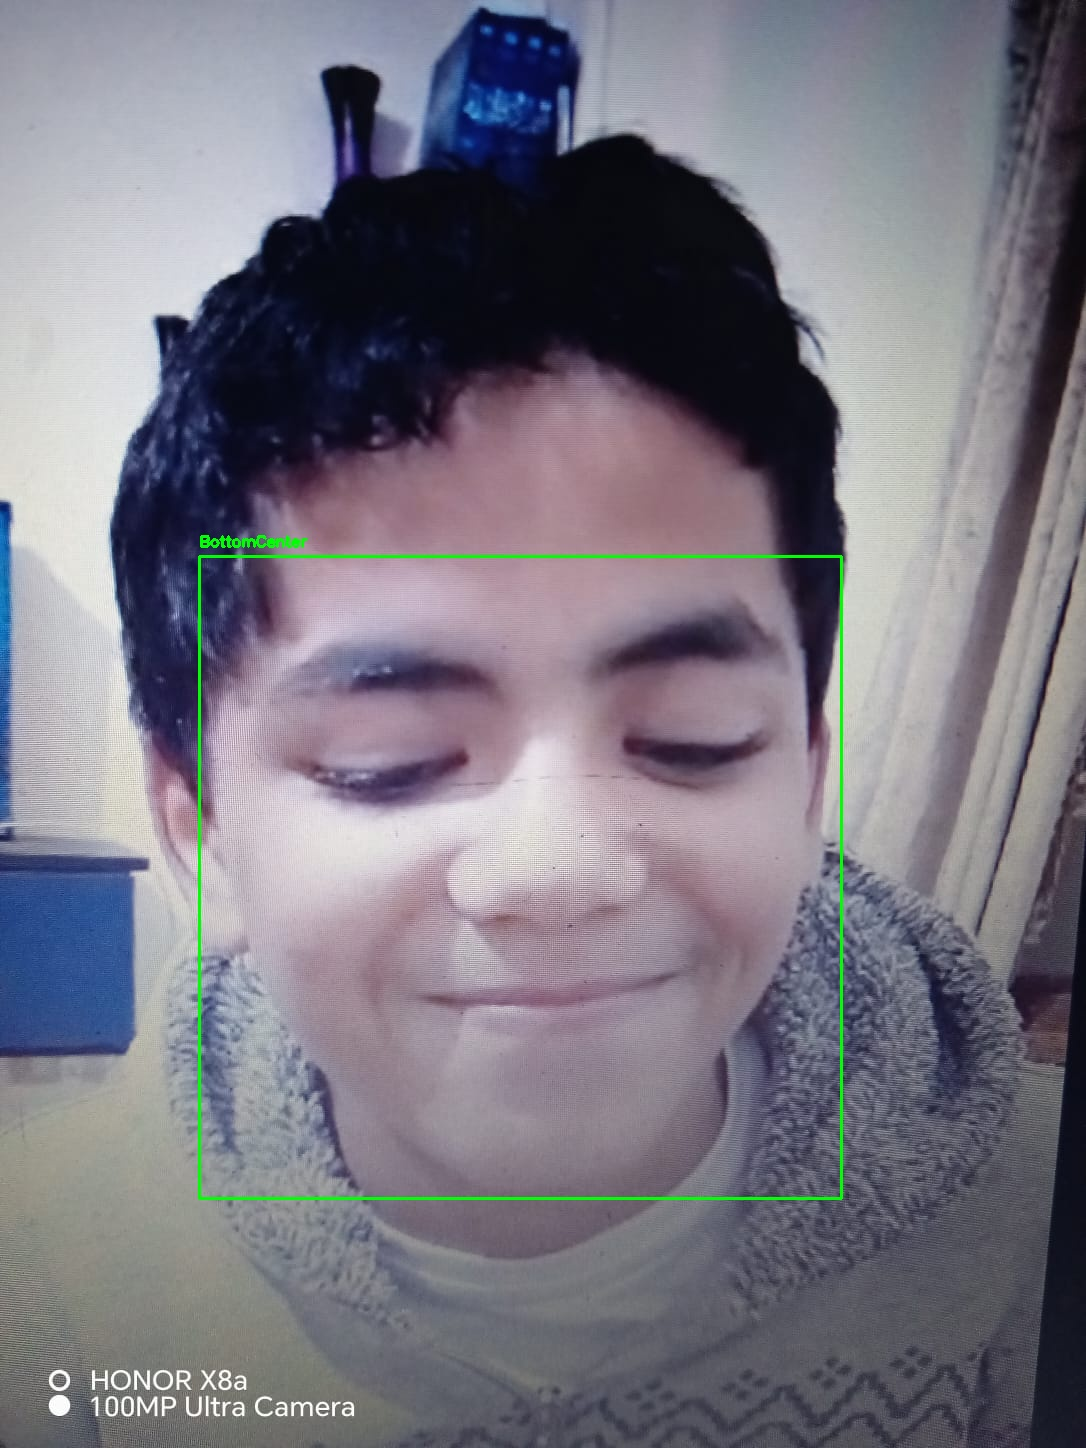

In [6]:
import cv2
import dlib
import numpy as np
from joblib import load
from IPython.display import Image

# Load the saved Decision Tree model
model_path = "/kaggle/working/decision_tree_model.pkl"
dt = load(model_path)

# Load the face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/kaggle/input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat")

# Load the image
image_path = "/kaggle/input/bbbbbbbbbbb/close.jpeg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = detector(gray)

for idx, face in enumerate(faces):
    # Get the landmarks for the face
    landmarks = predictor(gray, face)
    
    # Get the points for the left eye
    left_eye_pts = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(36, 42)]
    left_eye_pts = np.array(left_eye_pts)
    
    # Find the bounding box for the left eye
    left_eye_x, left_eye_y, left_eye_w, left_eye_h = cv2.boundingRect(left_eye_pts)
    
    # Crop the left eye region from the image
    left_eye_image = gray[left_eye_y:left_eye_y+left_eye_h, left_eye_x:left_eye_x+left_eye_w]
    
    # Resize the left eye image to 100x100 pixels
    left_eye_image_resized = cv2.resize(left_eye_image, (100, 100))
    
    # Flatten the left eye image for prediction
    left_eye_flattened = left_eye_image_resized.flatten()
    
    # Make a prediction using the loaded Decision Tree model
    prediction = dt.predict([left_eye_flattened])[0]
    
    # Map the predicted label to its corresponding class
    label_map = {
            0: "TopLeft",
            1: "TopCenter",
            2: "TopRight",
            3: "MiddleLeft",
            4: "MiddleRight",
            5: "BottomLeft",
            6: "BottomCenter",
            7: "BottomRight"
        }
    predicted_class = label_map.get(prediction, "other_direction")
    
    # Display the predicted class on the image
    cv2.putText(image, predicted_class, (face.left(), face.top() - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

    # Print the classification result for the current face
    print(f"Face {idx + 1} - Classification Result: {predicted_class}")

# Save the annotated image to a file
output_path = "/kaggle/working/annotated_image.jpg"
cv2.imwrite(output_path, image)

# Display the annotated image using IPython.display.Image
Image(filename=output_path)


In [4]:
pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.4-cp310-cp310-linux_x86_64.whl size=3327200 sha256=ce51e3aacd712531b3384ef58725f7fcd05cf2ff1514bf5d092935f19f2fd392
  Stored in directory: /root/.cache/pip/wheels/08/5e/55/a7db8d57920eb2c2aa41c36dc4c6d3cd12323865de191a7211
Successfully built dlib
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to load and preprocess images
def load_images(path):
    images = []
    labels = []
    label_map = {
        "TopLeft": 0,
        "TopCenter": 1,
        "TopRight": 2,
        "MiddleLeft": 3,
        "MiddleRight": 4,
        "BottomLeft": 5,
        "BottomCenter": 6,
        "BottomRight": 7
    }
    for folder in os.listdir(path):
        if os.path.isdir(os.path.join(path, folder)):
            label = label_map.get(folder, -1)
            if label != -1:
                for file in os.listdir(os.path.join(path, folder)):
                    image_path = os.path.join(path, folder, file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (100, 100))  # Resize image to (100, 100)
                    images.append(image.flatten())  # Flatten image and append to images list
                    labels.append(label)  # Append label to labels list
    return np.array(images), np.array(labels)

# Load and preprocess the training dataset
X_train, y_train = load_images("/kaggle/input/eye-gaze-detection/ImprovementSet/ImprovementSet/ImprovementSet")

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate the Random Forest classifier on the validation set
y_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9345517241379311


In [8]:
import joblib

# Save the trained model
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

Face 1 - Classification Result: BottomCenter


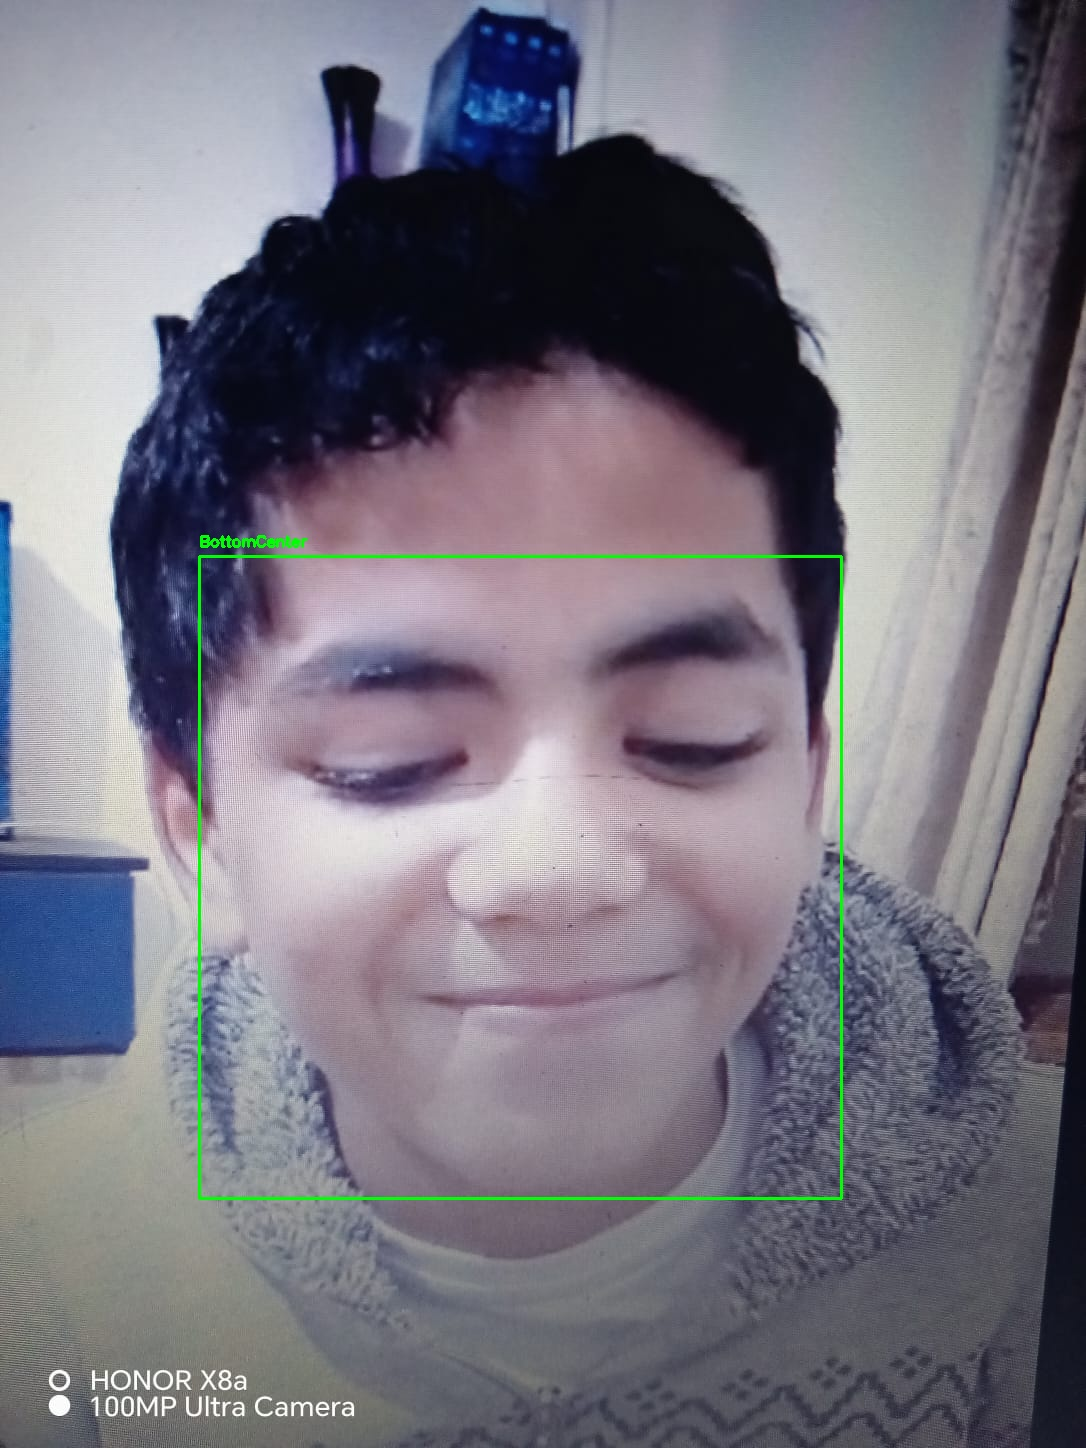

In [12]:
import cv2
import dlib
import numpy as np
from joblib import load
from IPython.display import Image

# Load the saved Decision Tree model
model_path = "/kaggle/working/random_forest_model.pkl"
dt = load(model_path)

# Load the face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/kaggle/input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat")

# Load the image
image_path = "/kaggle/input/bbbbbbbbbbb/close.jpeg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = detector(gray)

for idx, face in enumerate(faces):
    # Get the landmarks for the face
    landmarks = predictor(gray, face)
    
    # Get the points for the left eye
    left_eye_pts = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(36, 42)]
    left_eye_pts = np.array(left_eye_pts)
    
    # Find the bounding box for the left eye
    left_eye_x, left_eye_y, left_eye_w, left_eye_h = cv2.boundingRect(left_eye_pts)
    
    # Crop the left eye region from the image
    left_eye_image = gray[left_eye_y:left_eye_y+left_eye_h, left_eye_x:left_eye_x+left_eye_w]
    
    # Resize the left eye image to 100x100 pixels
    left_eye_image_resized = cv2.resize(left_eye_image, (100, 100))
    
    # Flatten the left eye image for prediction
    left_eye_flattened = left_eye_image_resized.flatten()
    
    # Make a prediction using the loaded Decision Tree model
    prediction = rf.predict([left_eye_flattened])[0]
    
    # Map the predicted label to its corresponding class
    label_map = {
            0: "TopLeft",
            1: "TopCenter",
            2: "TopRight",
            3: "MiddleLeft",
            4: "MiddleRight",
            5: "BottomLeft",
            6: "BottomCenter",
            7: "BottomRight"
        }
    predicted_class = label_map.get(prediction, "other_direction")
    
    # Display the predicted class on the image
    cv2.putText(image, predicted_class, (face.left(), face.top() - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

    # Print the classification result for the current face
    print(f"Face {idx + 1} - Classification Result: {predicted_class}")

# Save the annotated image to a file
output_path = "/kaggle/working/annotated_image.jpg"
cv2.imwrite(output_path, image)

# Display the annotated image using IPython.display.Image
Image(filename=output_path)


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Function to load and preprocess images
def load_images(path):
    images = []
    labels = []
    label_map = {
        "TopLeft": 0,
        "TopCenter": 1,
        "TopRight": 2,
        "MiddleLeft": 3,
        "MiddleRight": 4,
        "BottomLeft": 5,
        "BottomCenter": 6,
        "BottomRight": 7
    }
    for folder in os.listdir(path):
        if os.path.isdir(os.path.join(path, folder)):
            label = label_map.get(folder, -1)
            if label != -1:
                for file in os.listdir(os.path.join(path, folder)):
                    image_path = os.path.join(path, folder, file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (100, 100))  # Resize image to (100, 100)
                    images.append(image.flatten())  # Flatten image and append to images list
                    labels.append(label)  # Append label to labels list
    return np.array(images), np.array(labels)

# Load and preprocess the training dataset
X_train, y_train = load_images("/kaggle/input/eye-gaze-detection/ImprovementSet/ImprovementSet/ImprovementSet")

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train an XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Evaluate the XGBoost classifier on the validation set
y_pred_xgb = xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
